In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [33]:
df = pd.read_csv("HousePricesHW1.csv")
df.head()

,Price,MtrsToBeach,SqMtrs,Age,NumStores,DogParkInd,SchoolScores
0,1775400.0,282.841643,192.75,64.000000,0,0,81
1,594000.0,3339.265245,57.75,82.000000,5,1,77
2,1993200.0,336.327040,147.00,50.000000,33,0,85
3,1683000.0,1734.152739,126.00,28.000000,15,0,81
4,4059000.0,404.244740,406.50,7.350296,20,0,78


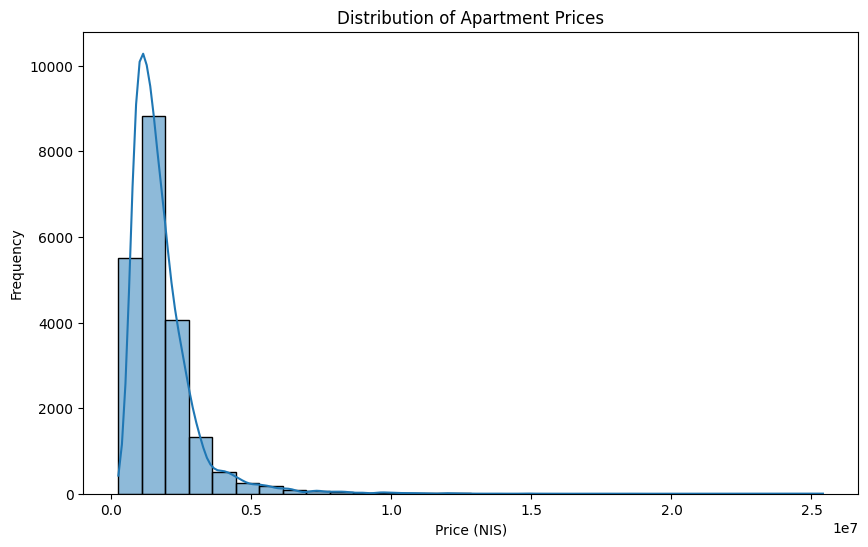

In [34]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df["Price"], kde=True, bins=30)

plt.title("Distribution of Apartment Prices")
plt.xlabel("Price (NIS)")
plt.ylabel("Frequency")

plt.grid(False)
plt.show()

In [35]:
# Summary statistics
mean_price = df["Price"].mean()
median_price = df["Price"].median()
std_price = df["Price"].std()

print(f"Mean: {mean_price:,.0f} NIS")
print(f"Median: {median_price:,.0f} NIS")
print(f"Standard Deviation: {std_price:,.0f} NIS")

Mean: 1,787,744 NIS
Median: 1,486,815 NIS
Standard Deviation: 1,212,122 NIS


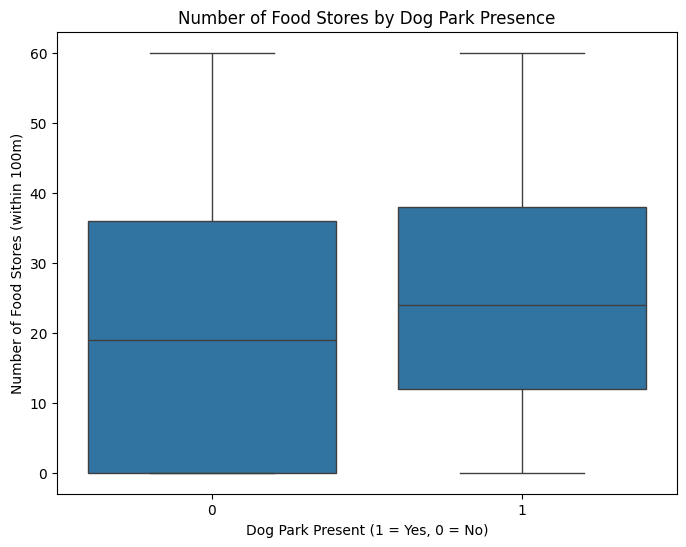

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="DogParkInd", y="NumStores", data=df)

plt.title("Number of Food Stores by Dog Park Presence")
plt.xlabel("Dog Park Present (1 = Yes, 0 = No)")
plt.ylabel("Number of Food Stores (within 100m)")
plt.grid(False)
plt.show()

In [37]:
# משתנה תלוי
y = df["Price"]

# משתנים מסבירים
X = df[["MtrsToBeach", "SqMtrs", "Age", "NumStores", "DogParkInd", "SchoolScores"]]

# מוסיפים intercept (קבוע)
X = sm.add_constant(X)

# בניית המודל
model_m1 = sm.OLS(y, X).fit()

# תצוגת סיכום
print(model_m1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     3739.
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        12:52:29   Log-Likelihood:            -3.1529e+05
No. Observations:               20932   AIC:                         6.306e+05
Df Residuals:                   20925   BIC:                         6.306e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.455e+05   1.56e+05      0.932   

In [44]:
add_18_meter = model_m1.params["SqMtrs"] * 18
add_18_meter

197796.9022353951

In [45]:
# משתנים מסבירים למודל m2
X_m2 = df[["MtrsToBeach", "SqMtrs", "Age"]]

# משתנה תלוי
y = df["Price"]

# הוספת intercept
X_m2 = sm.add_constant(X_m2)

# בניית המודל
model_m2 = sm.OLS(y, X_m2).fit()

# תצוגת הסיכום
print(model_m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     7322.
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        12:57:06   Log-Likelihood:            -3.1540e+05
No. Observations:               20932   AIC:                         6.308e+05
Df Residuals:                   20928   BIC:                         6.308e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.274e+05   2.29e+04     14.281      

In [47]:
add_18_meter = model_m2.params["SqMtrs"] * 18
add_18_meter

200752.25821947772

In [48]:
# משתנים מסבירים – כל משתני m1 **למעט NumStores**
X_no_stores = df[["MtrsToBeach", "SqMtrs", "Age", "DogParkInd", "SchoolScores"]]
y = df["Price"]

# הוספת קבוע
X_no_stores = sm.add_constant(X_no_stores)

# בניית המודל
model_no_stores = sm.OLS(y, X_no_stores).fit()

# תצוגת הסיכום
print(model_no_stores.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     4415.
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        13:01:25   Log-Likelihood:            -3.1538e+05
No. Observations:               20932   AIC:                         6.308e+05
Df Residuals:                   20926   BIC:                         6.308e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.125e+05   1.57e+05      1.357   